In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class Image:
    def __init__(self, path):
        self.image = cv2.imread(path, 0)
        print('the input ',self.image)

    def show_image(self):
        cv2.imshow('Before modification', self.image)
        cv2.waitKey(0)

    def padding(self):
        self.imgarr=np.array(self.image)
        self.imgarr=np.insert(self.imgarr,0,np.zeros(self.imgarr.shape[1]),axis=0)
        self.imgarr=np.insert(self.imgarr,0,np.zeros(self.imgarr.shape[0]),axis=1)
        self.imgarr=np.append(self.imgarr,[np.zeros(self.imgarr.shape[1])],axis=0)
        self.imgarr=np.append(self.imgarr,np.zeros((self.imgarr.shape[0],1)),axis=1)
        self.imgarr=self.imgarr.astype(np.uint8)
        # cv2.imshow('01',self.imgarr)
        # cv2.waitKey(0)


    def alpha_trimmed_mean_filter(self, alpha_array, window_size):
        adjustment = window_size // 2
        output_images = []
        for alpha in alpha_array:
            output_image = np.zeros_like(self.imgarr)
            for i in range(adjustment, self.imgarr.shape[0] - adjustment):
                for j in range(adjustment, self.imgarr.shape[1] - adjustment):
                    window = self.imgarr[i - adjustment: i + adjustment + 1, j - adjustment: j + adjustment + 1]
                    window_values = window.flatten()
                    sorted_values = np.sort(window_values)
                    trimmed_values = sorted_values[alpha: -alpha]
                    if len(trimmed_values) == 0:
                        mean_value = np.median(window_values)  
                    else:
                        mean_value = np.mean(trimmed_values)

                    output_image[i, j] = mean_value
            output_images.append(output_image)
        print('the output ',output_images)
        return output_images

the input  [[240 240 240 ... 255 255 255]
 [240 240 240 ... 255 255 255]
 [240 240 240 ... 255 255 255]
 ...
 [255 255 255 ... 112 112 114]
 [255 255 255 ... 112 112 114]
 [255 255 255 ...  88  88 106]]
the output  [array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 102, 171, ..., 182, 109,   0],
       [  0, 171, 240, ..., 255, 182,   0],
       ...,
       [  0, 182, 255, ..., 108,  76,   0],
       [  0, 109, 182, ...,  72,  43,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  96, 192, ..., 204, 102,   0],
       [  0, 192, 240, ..., 255, 204,   0],
       ...,
       [  0, 204, 255, ..., 110,  83,   0],
       [  0, 102, 204, ...,  78,  38,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  80, 240, ..., 255,  85,   0],
       [  0, 240, 240, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 112, 102,   0],
       [  0,  

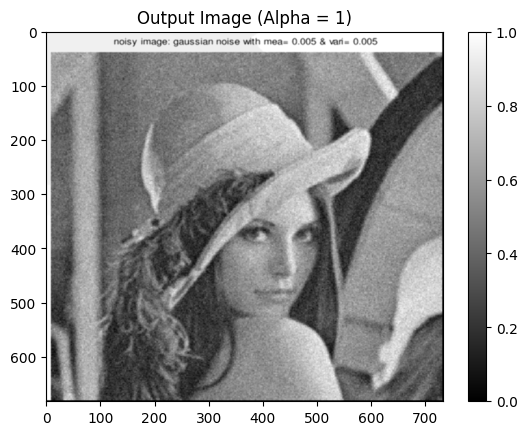

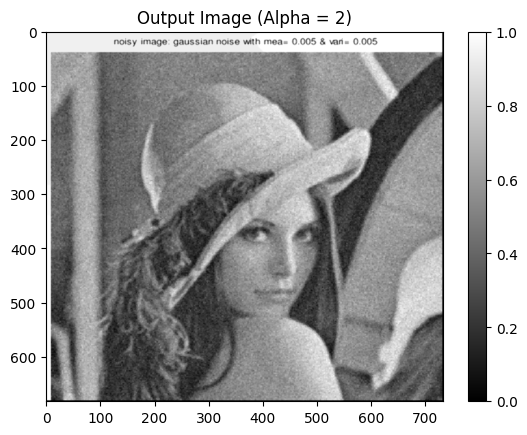

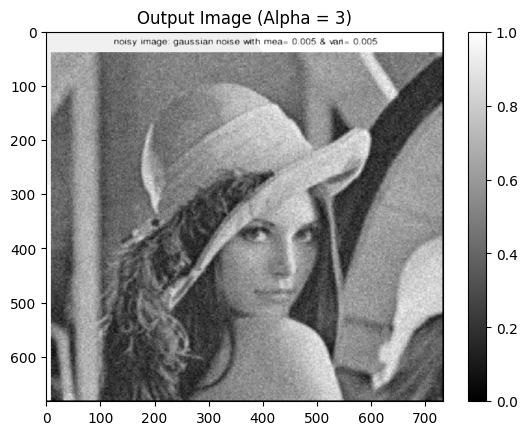

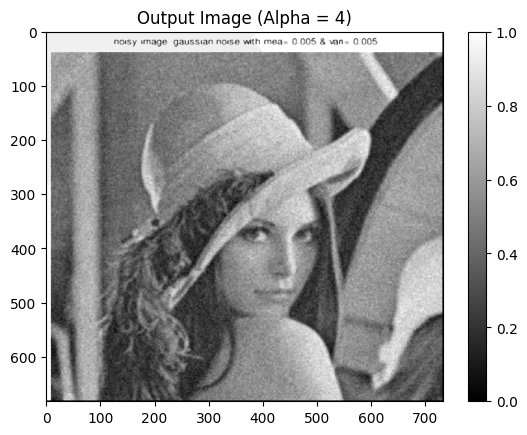

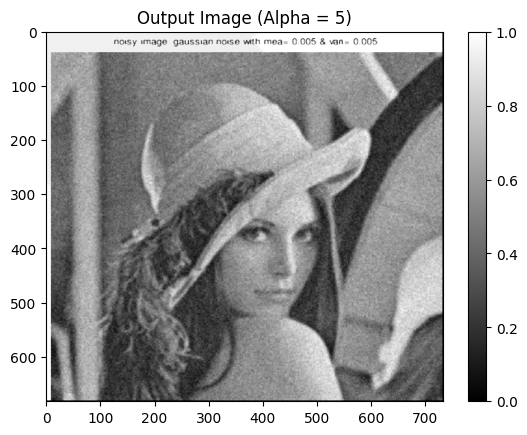

In [4]:
img=Image("Noisy-image-Gaussian-noise-with-mean-and-variance-0005.png")
# img.show_image()
img.padding()
window_size = 3
d = np.array([1, 2, 3,4,5]) 
output_images = img.alpha_trimmed_mean_filter(d, window_size)
for i, output_image in enumerate(output_images):
    adjusted_image  = output_image.astype(float) / 255.0 
    plt.imshow( adjusted_image , cmap='gray')
    plt.title(f'Output Image (Alpha = {i+1})')
    plt.colorbar()
    plt.show()
